In [1]:
# Определение процента ложноположительных срабатываний конкретной реализации для стандартного фильтра Блума.

from blooms_filter import BloomsFilter
from test_false_positive_rate import test_false_positive_rate

bf = BloomsFilter(m=10000, k=5)
fpr = test_false_positive_rate(bf, num_inserted=1000, num_tests=10000)
print(f"Процент ложноположительных срабатываний: {fpr:.2%}")

Процент ложноположительных срабатываний: 1.02%


m \ k	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19
5000	0.1782	0.1101	0.0895	0.0857	0.0964	0.1104	0.1429	0.1649	0.2003	0.2433	0.2987	0.3146	0.3613	0.3907	0.4679	0.5497	0.5764	0.6087	0.6618
7500	0.1230	0.0518	0.0332	0.0307	0.0299	0.0279	0.0322	0.0345	0.0397	0.0550	0.0558	0.0689	0.0787	0.0971	0.1024	0.1412	0.1581	0.1763	0.2022
10000	0.0910	0.0300	0.0168	0.0111	0.0102	0.0070	0.0086	0.0096	0.0084	0.0091	0.0101	0.0128	0.0157	0.0197	0.0219	0.0257	0.0325	0.0419	0.0471
12500	0.0709	0.0214	0.0097	0.0062	0.0045	0.0026	0.0025	0.0032	0.0016	0.0029	0.0031	0.0026	0.0033	0.0058	0.0047	0.0044	0.0057	0.0100	0.0076
15000	0.0634	0.0177	0.0056	0.0033	0.0021	0.0015	0.0013	0.0013	0.0012	0.0005	0.0007	0.0010	0.0008	0.0007	0.0015	0.0019	0.0014	0.0016	0.0021
17500	0.0529	0.0128	0.0036	0.0020	0.0006	0.0005	0.0008	0.0005	0.0004	0.0004	0.0003	0.0005	0.0009	0.0003	0.0003	0.0005	0.0005	0.0005	0.0008
20000	0.0465	0.0092	0.0018	0.0014	0.0008	0.0001	0.0004	0.0000	0.0003	0.0004	0.0002	0.0001	0.0000	0.0001	0.0002	0.0

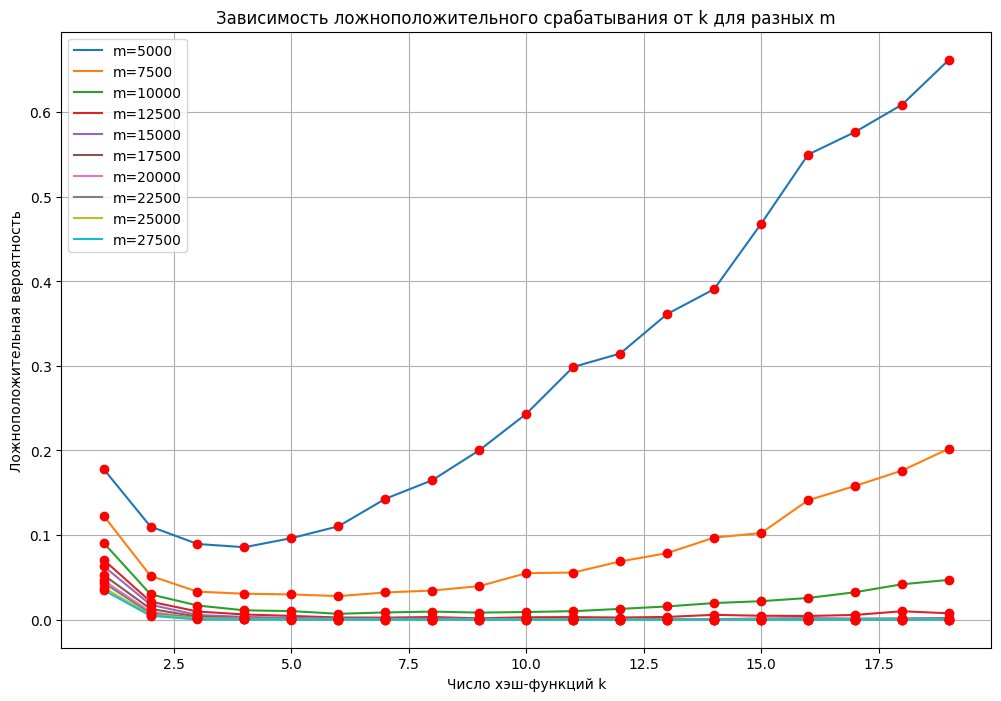

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from test_false_positive_rate import test_false_positive_rate

def evaluate_fpr(m_values, k_values, num_inserted, num_tests):
    results = []
    for m in m_values:
        row = []
        for k in k_values:
            bf = BloomsFilter(m=m, k=k)
            fpr = test_false_positive_rate(bf, num_inserted, num_tests)
            row.append(fpr)
        results.append(row)
    return results

num_inserted = 1000
num_tests = 10000
m_values = [i for i in range(5000, 30000, 2500)]
k_values = np.arange(1, 20)

fpr_data = evaluate_fpr(m_values, k_values, num_inserted, num_tests)
header = "m \\ k\t" + "\t".join([str(k) for k in k_values])
print(header)
for idx, m in enumerate(m_values):
    row = f"{m}\t" + "\t".join([f"{fpr_data[idx][i]:.4f}" for i in range(len(k_values))])
    print(row)

plt.figure(figsize=(12, 8))

for m in m_values:
    rates = [fpr_data[m_values.index(m)][i] for i in range(len(k_values))]
    plt.plot(k_values, rates, label=f'm={m}')
    plt.scatter(k_values, rates, color='red', zorder=5)

plt.xlabel('Число хэш-функций k')
plt.ylabel('Ложноположительная вероятность')
plt.title('Зависимость ложноположительного срабатывания от k для разных m')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# Определение процента ложноположительных срабатываний конкретной реализации для фильтра Блума с счётчиком.

import random
from blooms_filter_with_counter import CountingBloomsFilter

m = 10000
k = 5
num_inserted = 1000
num_tests = 10000 

cbf = CountingBloomsFilter(m, k)

inserted_items = list(set(random.randint(0, 10**6) for _ in range(num_inserted)))
for item in inserted_items:
    cbf.add(item)

test_items = list(set(random.randint(10**6, 2 * 10**6) for _ in range(num_tests)))

false_positives_after_add = sum(1 for item in test_items if item in cbf)
fpr_after_add = false_positives_after_add / num_tests
print(f"Процент ложноположительных срабатываний после добавления: {fpr_after_add:.2%}")

for item in inserted_items[:len(inserted_items) // 2]:
    cbf.remove(item)

false_positives_after_removal = sum(1 for item in test_items if item in cbf)
fpr_after_removal = false_positives_after_removal / num_tests
print(f"Процент ложноположительных срабатываний после удаления: {fpr_after_removal:.2%}")

Процент ложноположительных срабатываний после добавления: 1.05%
Процент ложноположительных срабатываний после удаления: 0.07%


Таблица ложноположительных срабатываний (FPR) для CountingBloomsFilter:
m\k	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19
5000	18.0220%	10.6120%	9.1360%	8.9860%	10.2280%	11.1960%	13.3140%	16.8920%	19.5260%	23.0540%	28.0620%	30.8780%	36.2740%	40.7060%	46.6760%	50.6160%	55.7780%	61.5820%	64.8320%
7500	12.3400%	5.2080%	3.5220%	2.9420%	2.7440%	2.8660%	2.9600%	3.4420%	3.8500%	5.1440%	5.7200%	6.7040%	7.9960%	9.4000%	11.6660%	12.9160%	15.0860%	17.2100%	20.6260%
10000	9.2860%	3.2280%	1.7020%	1.1520%	0.9200%	0.8180%	0.8160%	0.8960%	0.9140%	1.0000%	1.2020%	1.3880%	1.7160%	1.9100%	2.2980%	2.8800%	3.4080%	3.8380%	4.6020%
12500	7.6360%	2.1640%	0.9800%	0.5780%	0.3740%	0.2780%	0.2560%	0.2620%	0.2720%	0.2540%	0.2800%	0.3040%	0.3080%	0.4140%	0.4820%	0.4980%	0.6520%	0.7980%	0.9380%
15000	6.4220%	1.6420%	0.5400%	0.3000%	0.2020%	0.1160%	0.1140%	0.0900%	0.0700%	0.0680%	0.0760%	0.0820%	0.0920%	0.0980%	0.0980%	0.1040%	0.1500%	0.1580%	0.2060%
17500	5.6160%	1.1400%	0.3560%	0.1660%	0.0880%	0.0380%	0.0420%	0.0

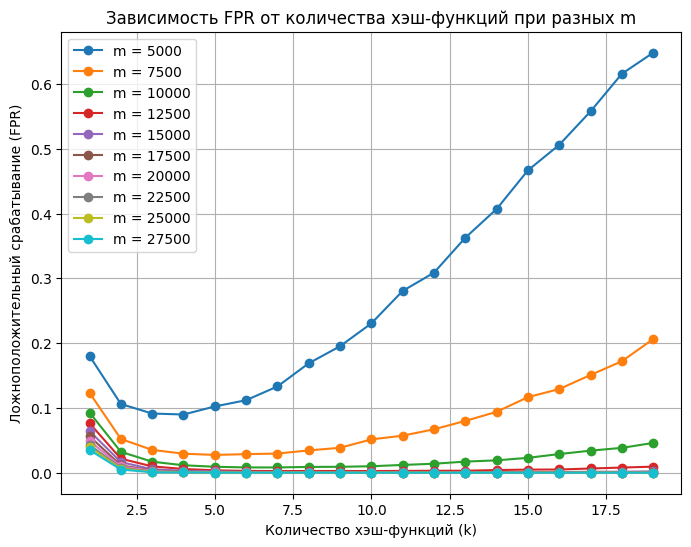

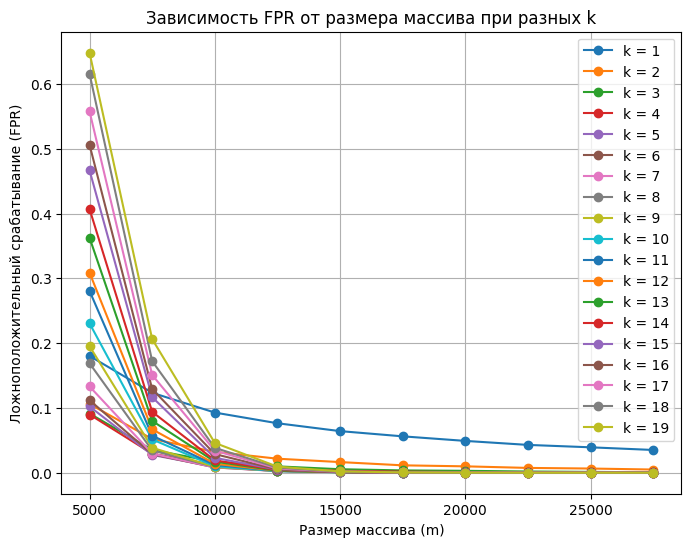

In [4]:
# Оценка зависимости ложноположительных срабатываний от гиперпараметров алгоритма (таблица и графики зависимостей).

def simulate_fpr(m, k, num_inserted=1000, num_tests=10000, num_runs=5):
    """
    Проводит серию запусков эксперимента для заданных параметров и возвращает усреднённое значение FPR.
    
    m          - размер массива счётчиков
    k          - количество хэш-функций
    num_inserted - количество добавляемых элементов
    num_tests    - количество тестовых элементов (не добавленных)
    num_runs     - число запусков для усреднения результата
    """
    fpr_total = 0
    for _ in range(num_runs):
        cbf = CountingBloomsFilter(m, k)
        inserted_items = list(set(random.randint(0, 10**6) for _ in range(num_inserted)))
        for item in inserted_items:
            cbf.add(item)
        test_items = list(set(random.randint(10**6, 2 * 10**6) for _ in range(num_tests)))
        false_positives = sum(1 for item in test_items if item in cbf)
        fpr_total += false_positives / num_tests
    return fpr_total / num_runs

m_values = [i for i in range(5000, 30000, 2500)]
k_values = np.arange(1, 20)

results = {}
table_data = []

for m in m_values:
    row = []
    for k in k_values:
        fpr = simulate_fpr(m, k)
        results[(m, k)] = fpr
        row.append(f"{fpr:.4%}")
    table_data.append(row)

print("Таблица ложноположительных срабатываний (FPR) для CountingBloomsFilter:")
print("m\\k\t" + "\t".join(str(k) for k in k_values))
for m, row in zip(m_values, table_data):
    print(f"{m}\t" + "\t".join(row))

plt.figure(figsize=(8, 6))
for m in m_values:
    fpr_values = [results[(m, k)] for k in k_values]
    plt.plot(k_values, fpr_values, marker='o', label=f"m = {m}")
plt.xlabel("Количество хэш-функций (k)")
plt.ylabel("Ложноположительный срабатывание (FPR)")
plt.title("Зависимость FPR от количества хэш-функций при разных m")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
for k in k_values:
    fpr_values = [results[(m, k)] for m in m_values]
    plt.plot(m_values, fpr_values, marker='o', label=f"k = {k}")
plt.xlabel("Размер массива (m)")
plt.ylabel("Ложноположительный срабатывание (FPR)")
plt.title("Зависимость FPR от размера массива при разных k")
plt.legend()
plt.grid(True)
plt.show()
